### 1. Develop a DMD model to forecast the future population states

#### Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/table.csv')
df = df.set_index(['year'])
df.head()

,hare,lynx
year,,
1845,20,32
1847,20,50
1849,52,12
1851,83,10
1853,64,13


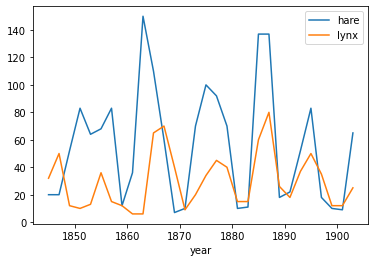

In [3]:
df.plot()

#### Prepare variables

In [4]:
years = df.index.values
x    = df.values
x

array([[ 20,  32],
       [ 20,  50],
       [ 52,  12],
       [ 83,  10],
       [ 64,  13],
       [ 68,  36],
       [ 83,  15],
       [ 12,  12],
       [ 36,   6],
       [150,   6],
       [110,  65],
       [ 60,  70],
       [  7,  40],
       [ 10,   9],
       [ 70,  20],
       [100,  34],
       [ 92,  45],
       [ 70,  40],
       [ 10,  15],
       [ 11,  15],
       [137,  60],
       [137,  80],
       [ 18,  26],
       [ 22,  18],
       [ 52,  37],
       [ 83,  50],
       [ 18,  35],
       [ 10,  12],
       [  9,  12],
       [ 65,  25]])

In [5]:
x.shape

(30, 2)

In [6]:
r   = 2
X1  = x[:-1].T
X2  = x[1:].T

#### Define DMD function 

In [7]:
def DMD(X,Xprime,r):
    
    # Step 1
    U,Sigma,VT = np.linalg.svd(X,full_matrices=0) 
    Ur = U[:,:r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r,:]
    
    # Step 2
    Atilde = np.linalg.solve(Sigmar.T,(Ur.T @ Xprime @ VTr.T).T).T 
    
    # Step 3
    Lambda, W = np.linalg.eig(Atilde) 
    Lambda = np.diag(Lambda)
    
    # Step 4
    Phi = Xprime @ np.linalg.solve(Sigmar.T,VTr).T @ W 
    alpha1 = Sigmar @ VTr[:,0]
    b = np.linalg.solve(W @ Lambda,alpha1)
    
    return Phi, Lambda, b

#### Run DMD

In [8]:
Phi, Lambda, b = DMD(X1,X2,r)

In [9]:
b.shape

(2,)

In [10]:
b

array([-28.67853772,  52.50084268])

In [11]:
Lambda.shape

(2, 2)

In [12]:
Lambda

array([[0.7247559 , 0.        ],
       [0.        , 0.37843393]])

In [13]:
Phi.shape

(2, 2)

In [14]:
Phi

array([[-0.58132296,  0.06339913],
       [-0.43282183,  0.37308549]])

#### Forecast 10 time steps

In [15]:
omega = np.log(Lambda)/2

In [16]:
forecast = []

for i in np.arange(0,30,2):
    x = Phi @ np.exp(omega*i) * b
    forecast.append(x.flatten())
forecast = np.array(forecast)

In [17]:
forecast

array([[           nan,            nan,            nan,            nan],
       [1.20827624e+01, 1.25962022e+00, 8.99617548e+00, 7.41249992e+00],
       [8.75705336e+00, 4.76683026e-01, 6.52003126e+00, 2.80514144e+00],
       [6.34672609e+00, 1.80393029e-01, 4.72543112e+00, 1.06156069e+00],
       [4.59982718e+00, 6.82668420e-02, 3.42478408e+00, 4.01730578e-01],
       [3.33375189e+00, 2.58344890e-02, 2.48213247e+00, 1.52028480e-01],
       [2.41615635e+00, 9.77664709e-03, 1.79894015e+00, 5.75327343e-02],
       [1.75112357e+00, 3.69981494e-03, 1.30379249e+00, 2.17723385e-02],
       [1.26913714e+00, 1.40013549e-03, 9.44931299e-01, 8.23939153e-03],
       [9.19814629e-01, 5.29858770e-04, 6.84844534e-01, 3.11806528e-03],
       [6.66641079e-01, 2.00516534e-04, 4.96345117e-01, 1.17998168e-03],
       [4.83152055e-01, 7.58822592e-05, 3.59729052e-01, 4.46545101e-04],
       [3.50167303e-01, 2.87164212e-05, 2.60715753e-01, 1.68987815e-04],
       [2.53785819e-01, 1.08672680e-05, 1.88955280e